In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
mall = pd.read_csv("D:\Intro\Aeon Mall_Customers 1.csv")

In [3]:
mall.head(10)

,CustomerID,Gender,Age,Monthly Income (million VND),Spending Score (25-600),Date,Membership
0,1,Male,19,6,172,14/4/2023,Silver
1,18,Male,20,16,178,14/4/2023,Silver
2,24,Male,31,27,453,14/4/2023,Gold
3,25,Female,54,41,193,14/4/2023,Silver
4,26,Male,29,21,285,14/4/2023,Silver
5,27,Female,45,42,108,14/4/2023,Silver
6,28,Male,35,35,400,14/4/2023,Gold
7,29,Female,40,30,179,14/4/2023,Silver
8,30,Female,23,31,312,14/4/2023,Gold
9,31,Male,60,34,176,14/4/2023,Silver


In [4]:
#Check to see descriptive statistics 
mall.describe()

,CustomerID,Age,Monthly Income (million VND),Spending Score (25-600)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,36.060000,32.420000,264.910000
std,57.879185,11.381745,18.669396,131.460302
min,1.000000,18.000000,2.000000,27.000000
25%,50.750000,27.750000,19.750000,170.750000
50%,100.500000,35.000000,31.000000,262.000000
75%,150.250000,46.000000,39.250000,349.250000
max,200.000000,60.000000,89.000000,599.000000


In [5]:
mall.isnull().sum()

CustomerID                      0
Gender                          0
Age                             0
Monthly Income (million VND)    0
Spending Score (25-600)         0
Date                            0
Membership                      0
dtype: int64

### Based on the following exploratory data analysis (EDA), we will clarify the frequently asked questions of customer segmentation in shopping malls such as:
+) Who are the potential customers of the mall?

+) Are high-income or lower-income customers the mall's target group?

+) Which age groups tend to shop the most in the mall?

+) Is there a difference in buying behavior between men and women?

+) Is there a relationship between customer income and spending?


## Distribution of data


C:\Users\Admin\AppData\Local\Temp\ipykernel_12684\258179955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall['Age'])


Text(0, 0.5, 'Count')

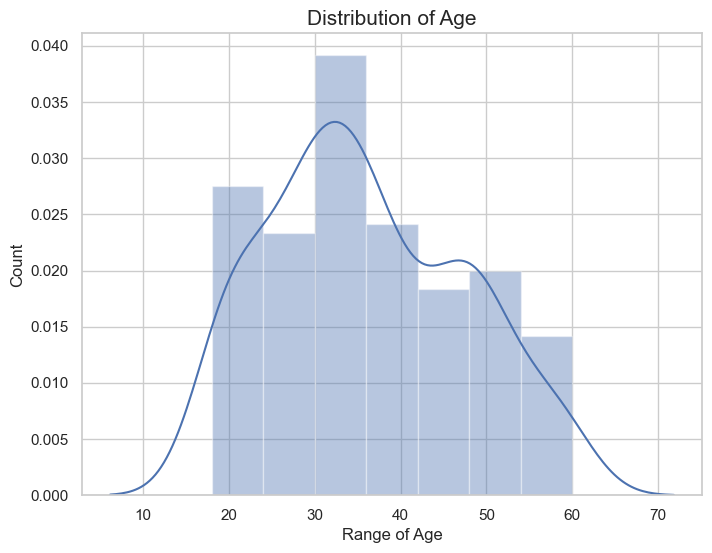

In [6]:
#Distribution of Age

plt.figure(figsize=(8, 6))
sns.set(style = 'whitegrid')
sns.distplot(mall['Age'])
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12684\1872074984.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall['Monthly Income (million VND)'])


Text(0, 0.5, 'Count')

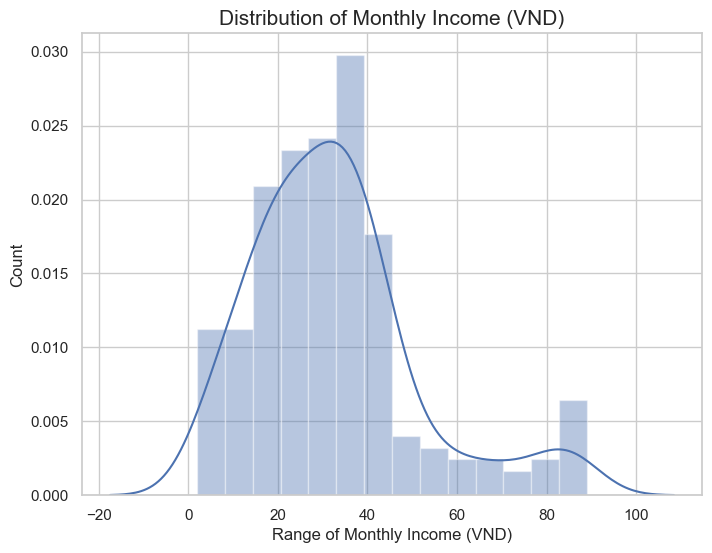

In [10]:
#Distribution of Monthly Income

plt.figure(figsize=(8, 6))
sns.set(style = 'whitegrid')
sns.distplot(mall['Monthly Income (million VND)'])
plt.title('Distribution of Monthly Income (VND)', fontsize = 15)
plt.xlabel('Range of Monthly Income (VND)')
plt.ylabel('Count')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10896\362489197.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall['Spending Score (25-600)'])


Text(0, 0.5, 'Count')

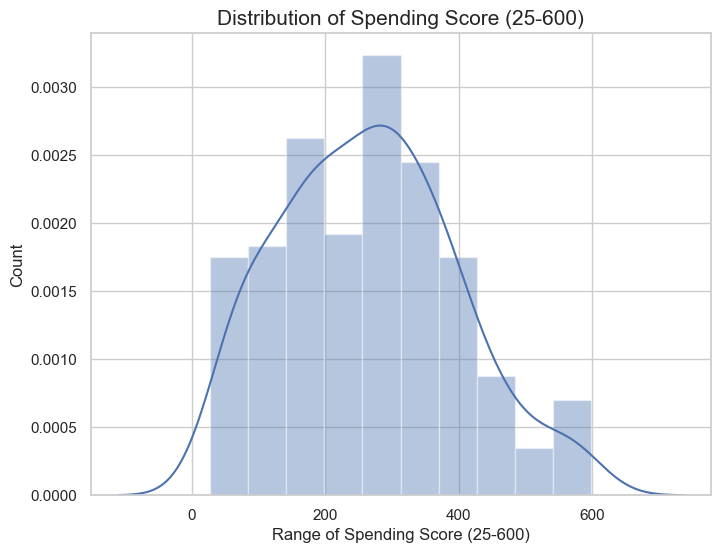

In [ ]:
#Distribution of Spending Score

plt.figure(figsize=(8,6))
sns.set(style = 'whitegrid')
sns.distplot(mall['Spending Score (25-600)'])
plt.title('Distribution of Spending Score (25-600)', fontsize = 15)
plt.xlabel('Range of Spending Score (25-600)')
plt.ylabel('Count')

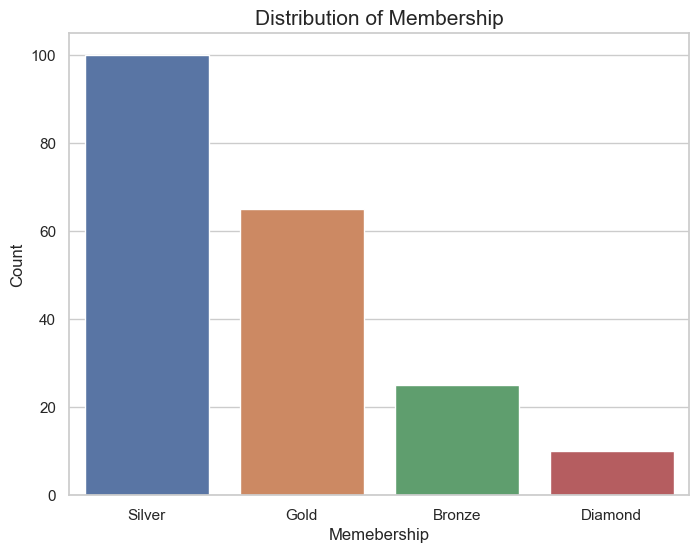

In [ ]:
#Distribution of Membership
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.countplot(x='Membership', data=mall)
plt.title('Distribution of Membership', fontsize=15)
plt.xlabel('Memebership')
plt.ylabel('Count')

plt.show()

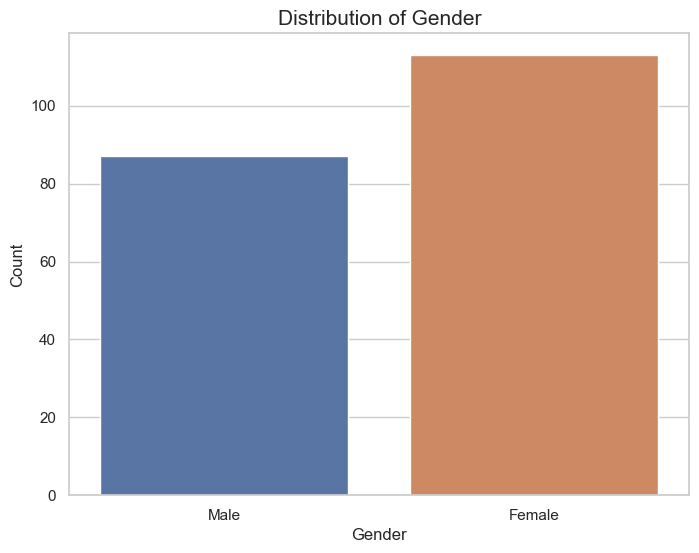

In [ ]:
#Distribution of Gender
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.countplot(x='Gender', data=mall)
plt.title('Distribution of Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

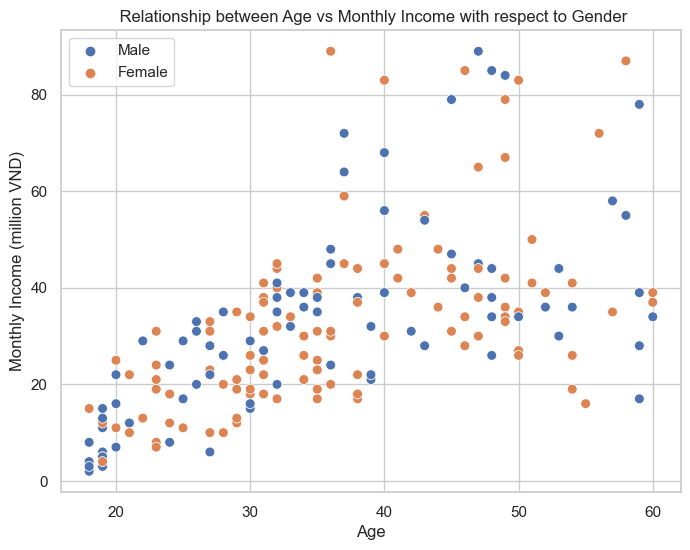

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Age' , y = 'Monthly Income (million VND)' , hue="Gender",data = mall  ,s = 50 )
plt.xlabel('Age'), plt.ylabel('Monthly Income (million VND)') 
plt.title(' Relationship between Age vs Monthly Income with respect to Gender')
plt.legend()
plt.show()

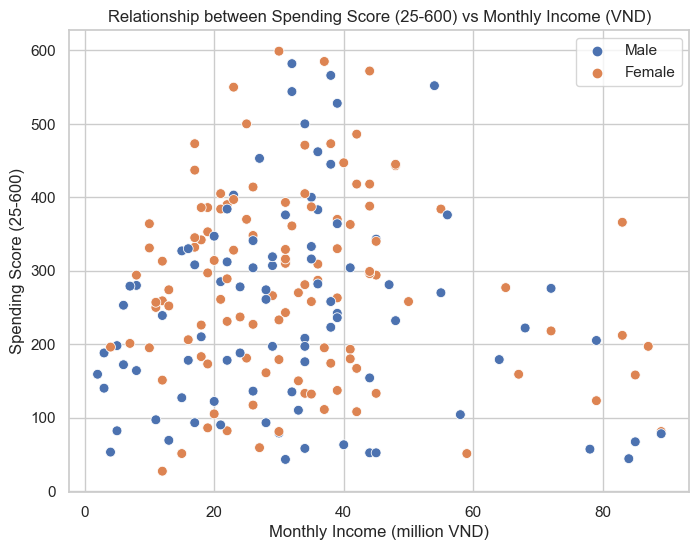

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Monthly Income (million VND)',y = 'Spending Score (25-600)'  , hue="Gender" ,data = mall  ,s = 50)
plt.xlabel('Monthly Income (million VND)')
plt.ylabel('Spending Score (25-600)') 
plt.title('Relationship between Spending Score (25-600) vs Monthly Income (VND)')
plt.legend()
plt.show()

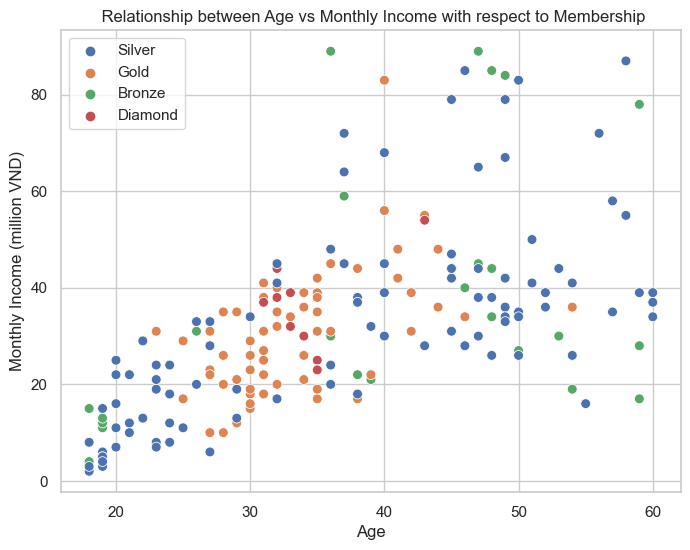

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Age' , y = 'Monthly Income (million VND)' , hue="Membership",data = mall  ,s = 50 )
plt.xlabel('Age'), plt.ylabel('Monthly Income (million VND)') 
plt.title(' Relationship between Age vs Monthly Income with respect to Membership')
plt.legend()
plt.show()

## Age Group

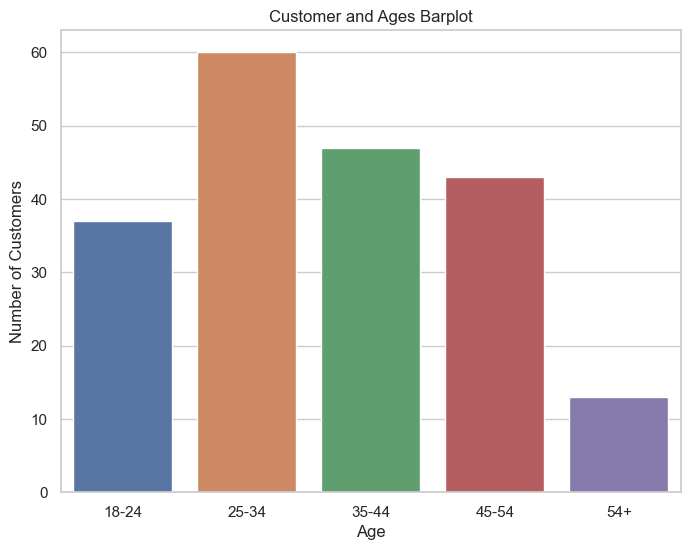

In [ ]:
age18_24 = mall.Age[(mall.Age <= 24) & (mall.Age >= 18)]
age25_34 = mall.Age[(mall.Age <= 34) & (mall.Age >= 25)]
age35_44 = mall.Age[(mall.Age <= 44) & (mall.Age >= 35)]
age45_54 = mall.Age[(mall.Age <= 54) & (mall.Age >= 45)]
age54above = mall.Age[mall.Age >= 55]

x = ["18-24","25-34","35-44","45-54","54+"]
y = [len(age18_24.values),len(age25_34.values),len(age35_44.values),len(age45_54.values),len(age54above.values)]

plt.figure(figsize=(8,6))
sns.barplot(x=x, y=y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

## Spending Score Group


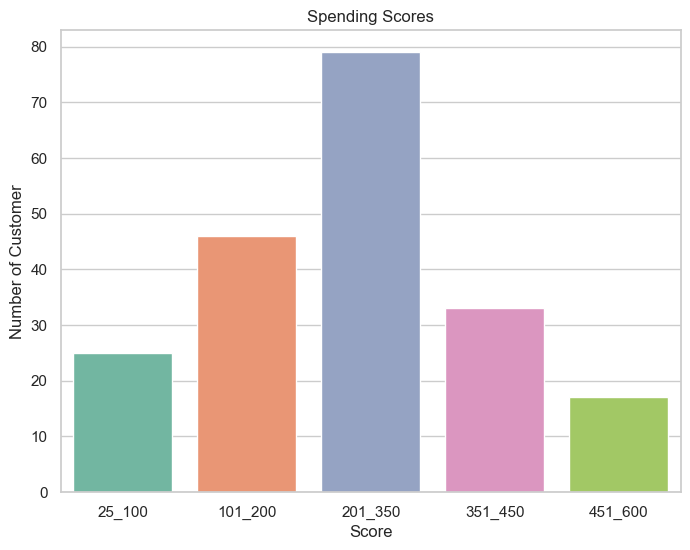

In [ ]:
ss25_100 = mall["Spending Score (25-600)"][(mall["Spending Score (25-600)"] >= 25) & (mall["Spending Score (25-600)"] <= 100)]
ss101_200 = mall["Spending Score (25-600)"][(mall["Spending Score (25-600)"] >= 101) & (mall["Spending Score (25-600)"] <= 200)]
ss201_350 = mall["Spending Score (25-600)"][(mall["Spending Score (25-600)"] >= 201) & (mall["Spending Score (25-600)"] <= 350)]
ss351_450 = mall["Spending Score (25-600)"][(mall["Spending Score (25-600)"] >= 351) & (mall["Spending Score (25-600)"] <= 450)]
ss451_600= mall["Spending Score (25-600)"][(mall["Spending Score (25-600)"] >= 451) & (mall["Spending Score (25-600)"] <= 600)]

score_x = ["25_100", "101_200", "201_350", "351_450", "451_600"]
score_y = [len(ss25_100.values), len(ss101_200.values), len(ss201_350.values), len(ss351_450.values), len(ss451_600.values)]

plt.figure(figsize=(8,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()



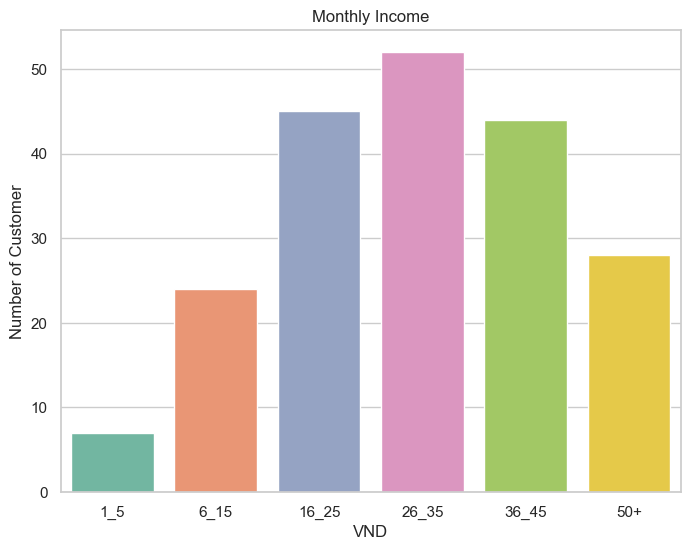

In [ ]:
#The chart shows monthly income (million VND) on a scale from  to 6
mi1_5 = mall["Monthly Income (million VND)"][(mall["Monthly Income (million VND)"] >= 1) & (mall["Monthly Income (million VND)"] <= 5)]
mi6_15 = mall["Monthly Income (million VND)"][(mall["Monthly Income (million VND)"] >= 6) & (mall["Monthly Income (million VND)"] <= 15)]
mi16_25 = mall["Monthly Income (million VND)"][(mall["Monthly Income (million VND)"] >= 16) & (mall["Monthly Income (million VND)"] <= 25)]
mi26_35 = mall["Monthly Income (million VND)"][(mall["Monthly Income (million VND)"] >= 26) & (mall["Monthly Income (million VND)"] <= 35)]
mi36_45= mall["Monthly Income (million VND)"][(mall["Monthly Income (million VND)"] >= 36) & (mall["Monthly Income (million VND)"] <= 45)]
mi50above = mall["Monthly Income (million VND)"][(mall["Monthly Income (million VND)"] >= 46)]

score_x = ["1_5", "6_15", "16_25", "26_35", "36_45", "50+"]
score_y = [len(mi1_5.values), len(mi6_15.values), len(mi16_25.values), len(mi26_35.values), len(mi36_45.values), len(mi50above.values)]

plt.figure(figsize=(8,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Monthly Income")
plt.xlabel("VND")
plt.ylabel("Number of Customer")
plt.show()



In [ ]:
#Checking the data again
mall

,CustomerID,Gender,Age,Monthly Income (million VND),Spending Score (25-600),Date,Membership
0,1,Male,19,6,172,14/4/2023,Silver
1,18,Male,20,16,178,14/4/2023,Silver
2,24,Male,31,27,453,14/4/2023,Gold
3,25,Female,54,41,193,14/4/2023,Silver
4,26,Male,29,21,285,14/4/2023,Silver
...,...,...,...,...,...,...,...
195,196,Female,35,31,329,6/5/2023,Gold
196,197,Female,45,44,299,6/5/2023,Silver
197,198,Male,32,38,566,6/5/2023,Diamond
198,199,Male,32,20,347,6/5/2023,Gold


## Clustering 


In [ ]:
#We take just the Monthly Income and Spending Score

Lin=mall[["Monthly Income (million VND)","Spending Score (25-600)"]]
Lin.tail(5)

,Monthly Income (million VND),Spending Score (25-600)
195,31,329
196,44,299
197,38,566
198,20,347
199,16,330


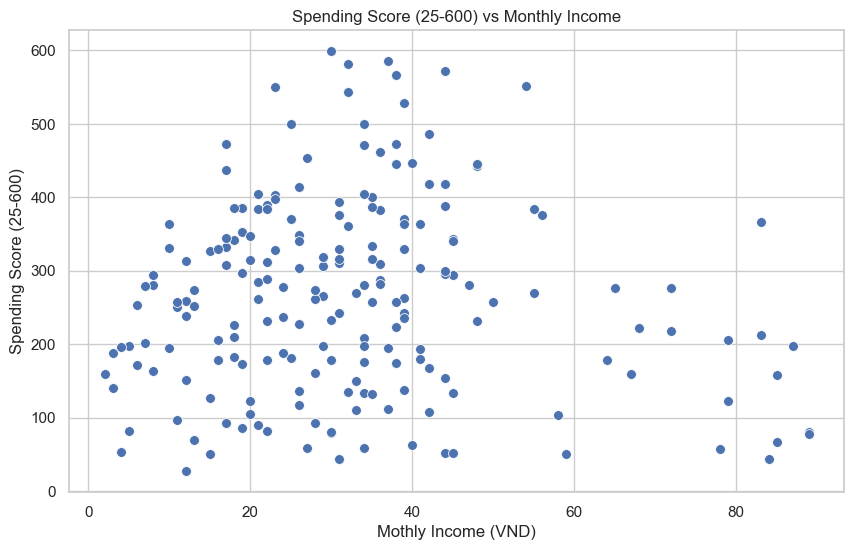

In [42]:
#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Monthly Income (million VND)',y = 'Spending Score (25-600)',  data = Lin  ,s = 50 )
plt.xlabel('Mothly Income (VND)')
plt.ylabel('Spending Score (25-600)') 
plt.title('Spending Score (25-600) vs Monthly Income')
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

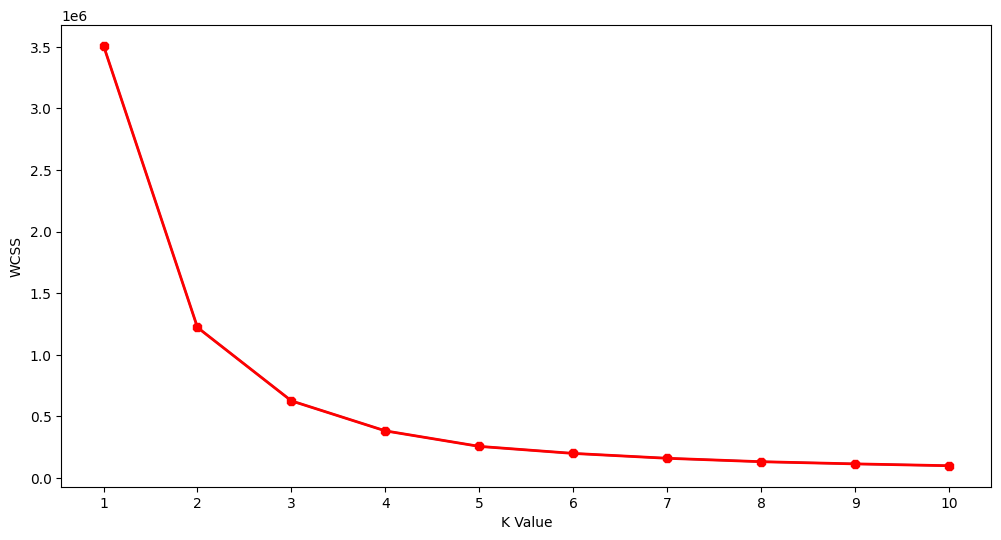

In [ ]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(Lin)
    wcss.append(km.inertia_)
    
#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [ ]:
#Taking 3 clustering
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(Lin)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df =mall[["CustomerID","Gender","Age","Monthly Income (million VND)","Spending Score (25-600)","Date", "Membership"]]

#predicting the labels of the input data
y=km1.predict(Lin)
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head(10)

,CustomerID,Gender,Age,Monthly Income (million VND),Spending Score (25-600),Date,Membership,label
0,1,Male,19,6,172,14/4/2023,Silver,2
1,18,Male,20,16,178,14/4/2023,Silver,2
2,24,Male,31,27,453,14/4/2023,Gold,1
3,25,Female,54,41,193,14/4/2023,Silver,2
4,26,Male,29,21,285,14/4/2023,Silver,0
5,27,Female,45,42,108,14/4/2023,Silver,2
6,28,Male,35,35,400,14/4/2023,Gold,1
7,29,Female,40,30,179,14/4/2023,Silver,2
8,30,Female,23,31,312,14/4/2023,Gold,0
9,31,Male,60,34,176,14/4/2023,Silver,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_6808\3666017786.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x = 'Monthly Income (million VND)',y = 'Spending Score (25-600)',hue="label",


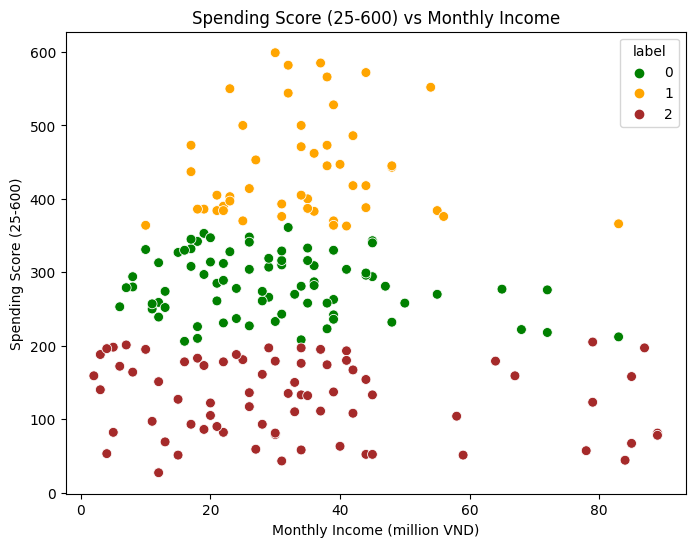

In [ ]:
#Scatterplot of the clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Monthly Income (million VND)',y = 'Spending Score (25-600)',hue="label",  
                 palette=['green','orange','brown'], legend='full',data = df  ,s = 50 )

plt.xlabel('Monthly Income (million VND)')
plt.ylabel('Spending Score (25-600)') 
plt.title('Spending Score (25-600) vs Monthly Income')
plt.show()

In [27]:
#Evaluation model
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(Lin)
print("Silhouette Coefficient: %0.3f" % silhouette_score(Lin, labels))

Silhouette Coefficient: 0.511


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Huấn luyện mô hình và gán nhãn cụm
labels = kmeans.fit_predict(Lin)

# Đánh giá độ chính xác (accuracy)
ground_truth_labels = y # Nhãn thực tế của từng điểm dữ liệu 
accuracy = accuracy_score(ground_truth_labels, labels)

print("Accuracy: %0.3f" % accuracy)


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.950


In [ ]:
cust1=df[df["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")


Number of customer in 1st group= 77
They are - [  1  18  25  27  29  31  33  34  39  40  43  45  46  47  23   4  51  55
  56  60  61  62  63  64  66  69  71  74  75  76  80  81  86  87  91  92
  93  97  99 102 103 104 105 106 107 109 129 130 131 132 135 139 111 112
 114 115 116 118 119 120 124 125  13  14 163 165 166  15 174 175  16 190
 179 181 183 141 194]
--------------------------------------------
Number of customer in 2nd group= 81
They are - [ 26  30  32  35  36  37  38  42  44  48   2  19  22   3  49  54  57  58
  59   5  68  72  73  77  78   6  79  82  83  85  88  90   8   9  94  96
 100 101  10 128 133 134 137  11 110 113 121 122 123 126 160 161 170 172
 173 184 186 187 188  17 177 142 143 144 145 146 147 148 151 152 155 156
 157 158 159 192 195 196 197 199 200]
--------------------------------------------
Number of customer in 3rd group= 42
They are - [ 24  28  20  21  41  50  52  53  65  67  70   7  84  89  95  98 108 127
 136 138 140  12 117 162 164 167 168 169 171 185 189